# Decision Tree classifier on Pima Indian Diabetes Datasets

In [1]:
#import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#download the iris dataset
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(r"C:\goes to phd\dataset\pima-indians-diabetes.csv", header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#split the dataset into features and target variable

feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

#divide the data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#train the model
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

#make prediction
y_pred = clf.predict(X_test)

#get the accuracy score, confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[117  29]
 [ 42  43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       146
           1       0.60      0.51      0.55        85

    accuracy                           0.69       231
   macro avg       0.67      0.65      0.66       231
weighted avg       0.68      0.69      0.69       231

Accuracy: 0.6926406926406926


In [3]:
!pip install graphviz
!pip install pydotplus

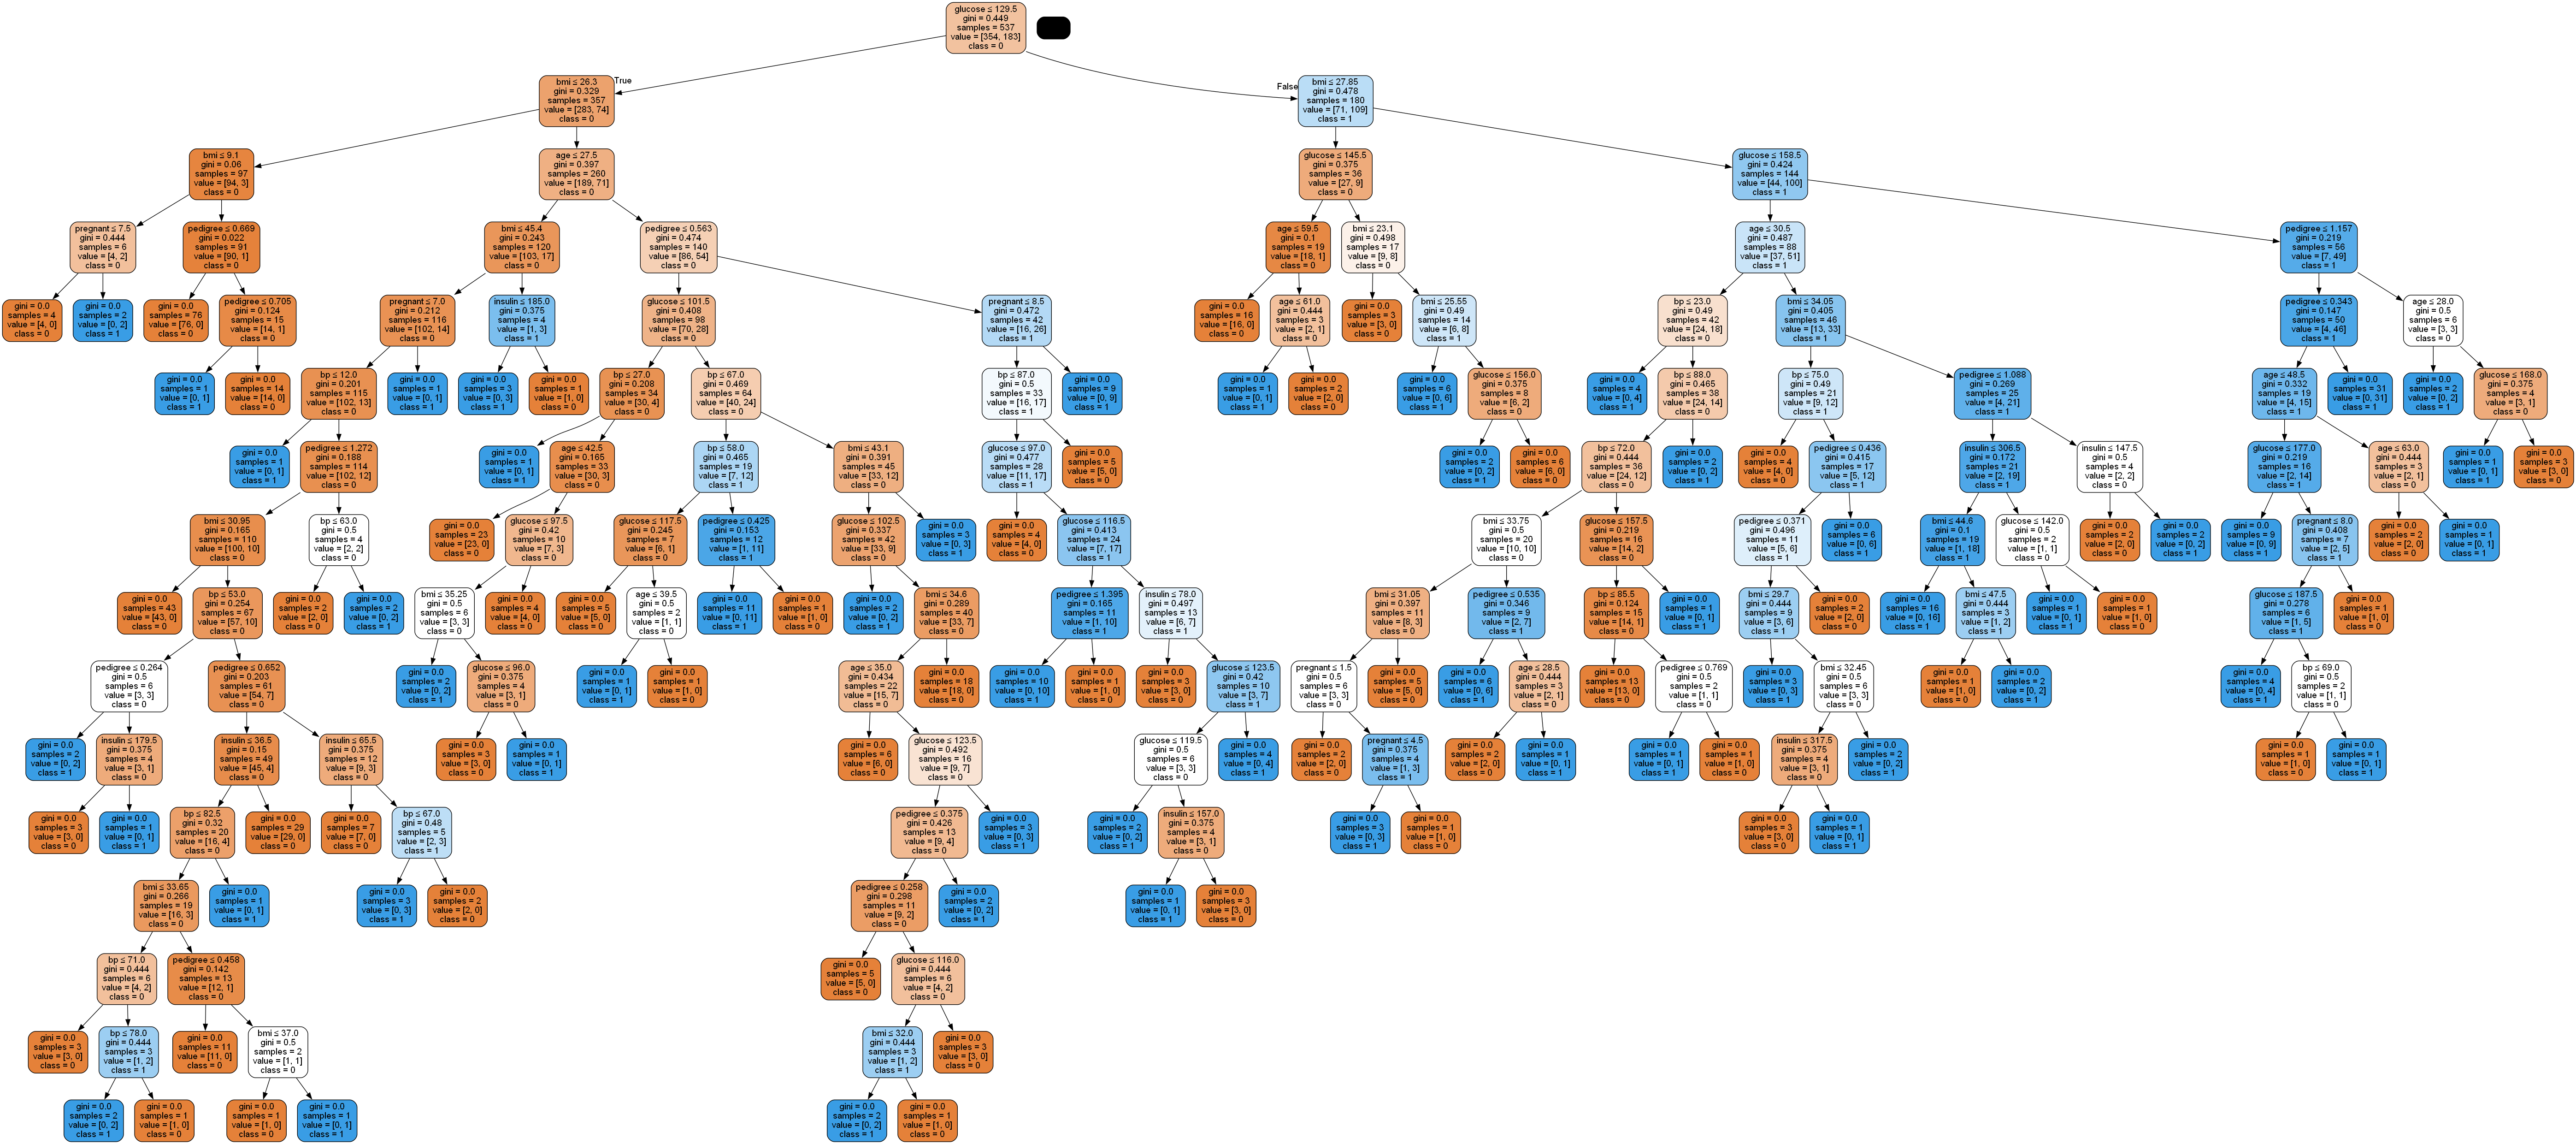

In [4]:
#Visualizing Decision Tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
      filled=True, rounded=True,
      special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Pima_diabetes_Tree.png')
Image(graph.create_png())